#Ejemplo Regresion Logistica usando el df(horas_estudio_vs_aprovacion)

##1. Cargamos las librerias

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



##2.Traemos la data 

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/2HenryCardenas1/DeepLearning/main/Databasets/horas_estudio_vs_aprobacion.csv")


,horas,aprueba
0,0.50,1
1,2.00,0
2,0.75,0
3,2.75,1
4,2.75,1
5,1.25,0
6,2.75,1
7,1.50,1
8,1.50,0
9,0.50,0


##3.Conociendo los datos que tiene el dataset

In [ ]:
#primeros 5 regirstros del dataframe
#df.head(5)
#dimensiones del dataframe
df.shape

(2000, 2)

###Verificando si hay datos nulos

In [ ]:
df.isnull().sum()

horas      0
aprueba    0
dtype: int64

###Graficando los datos del dataset

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})  #tamaño del grafico
sns.distplot(df['horas'])                #agregamos los datos
plt.show()

In [ ]:
X = df['horas']
y = df['aprueba']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('horas de estudio')
plt.ylabel('aprueba examen')
plt.show()

##4.Separando los datos para el entrenamiento

In [ ]:
#En X colocaremos el tiempo de estudio que tomaron los estudiantes antes del examen
#apilamos los datos que vienen en 1d a 2d  
#opcion 1: usamos np.c_
#X = pd.DataFrame(np.c_[df['horas']], columns = ['horas'])
#opcion2: usamos .reshape(-1, 1)
X = np.array(df['horas']).reshape(-1, 1)
#En Y colocaremos el resultado del examen (1 / 0 ) (aprobado / reprobado)
y= np.array(df['aprueba'])
print(X)

##5.Importamos la clase LogisticRegresion de scikit-learn

In [ ]:
#clase de regresión logistica disponsible en sklearn
from sklearn.linear_model import LogisticRegression
#Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()

##6.Entrenar la regresión logística con los datos de entrenamiento

In [ ]:
#entrenando modelo de regresión logistica
regresion_logistica.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##7.Haciendo predicciones

Tomaremos una grupo de horas y miraremos que probabilidad de pasar el examen tenemos

In [ ]:
#definimos que pasa si el estudiante estudia entre 1 a 6 horas
X_nuevo = np.array([1, 2, 3, 4, 5, 6]).reshape(-1,1)
#ejecutamos la predicción
prediccion = regresion_logistica.predict(X_nuevo)
print(prediccion)

[0 0 0 1 1 1]


##8.Generando probabilidades de la predicción

In [ ]:
probabilidades_prediccion = regresion_logistica.predict_proba(X_nuevo)
#la primera columna es la probabilidad de reprobar (0)
#la segunda columna es  la probabilidad de aprobar (1)
print(probabilidades_prediccion)
#si solo nos interesa la probabilidad de aprobar
print(probabilidades_prediccion[:,1])

[[0.5112111  0.4887889 ]
 [0.50683522 0.49316478]
 [0.50245829 0.49754171]
 [0.49808099 0.50191901]
 [0.49370398 0.50629602]
 [0.48932793 0.51067207]]
[0.4887889  0.49316478 0.49754171 0.50191901 0.50629602 0.51067207]


Estos valores no nos sirven para ni para ejemplo

#Ahora si, el ejemplo teniendo en cuenta las horas de estudio, dataset(horas_estudio_vs_aprovacion_vs_horas_de_estudio)

##1.Cargando Librerías necesarias

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

##2. Conectarse a google drive y cargar el CSV con el dataset

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/2HenryCardenas1/DeepLearning/main/Databasets/horas_estudio_tutorias_vs_aprobacion.csv")

##3. Conociendo los datos

In [3]:
#primeros 5 registros del dataframe
df.head(5)

,horas_autoestudio_diario,tutorias_mes,aprobo_perdio
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


In [4]:
#dimensiones del dataframe
print("matrix df [MxN] ->"+str(df.shape))
#verificamos que no hayan nulos
print("---Columnas con valores nulos--")
print(df.isnull().sum())

matrix df [MxN] ->(1000, 3)
---Columnas con valores nulos--
horas_autoestudio_diario    0
tutorias_mes                0
aprobo_perdio               0
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


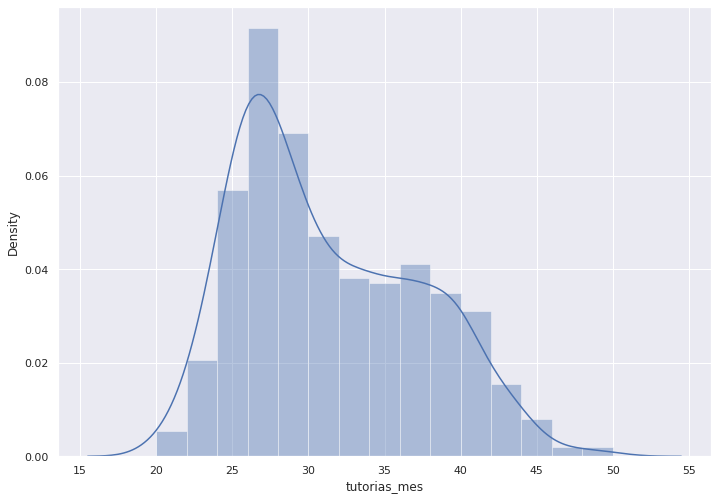

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})  #tamaño del grafico
sns.distplot(df['tutorias_mes'])                #agregamos los datos
plt.show()

##4.Separando los datos para el entrenamiento

separaremos las características y etiquetamos como X e Y respectivamente.

  -la variable X (horas_autoestudio_diario + tutorias_mes)
  -la varible Y (aprobo_perdio)

In [6]:
x = df.drop('aprobo_perdio',axis = 1)
y = df.aprobo_perdio
df.head()

,horas_autoestudio_diario,tutorias_mes,aprobo_perdio
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


Dividiremos los datos en conjuntos de train y test. Esto separará 25%(! valor predeterminado) de los datos en un subconjunto para la parte de prueba y el 75% restante se usará para nuestro subconjunto de entrenamiento

In [7]:
#separamos los datos 25%(test) y 75%(train)
#x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)
#Si deseamos cambiar la proporción solo debemos agregar la variable test_size=0.x 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4,test_size=0.2)

##5. importamos la clase LogisticRegresion de scikit-learn

In [8]:
#Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()

##6. Entrena la regresión logística con los datos de entrenamiento

In [9]:
#entrenando modelo de regresión logistica
regresion_logistica.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##7.Haciendo predicciones

In [10]:
#usaremos el 20% de los datos para probar el modelo
#ejecutamos la predicción con datos de prueba (x_test)
y_prediccion = regresion_logistica.predict(x_test)

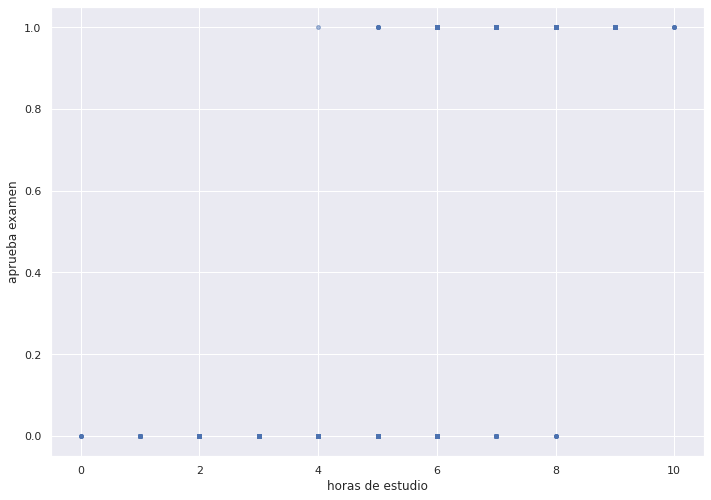

In [16]:
#visualizar la predicción en los datos de testeo
X = df['horas_autoestudio_diario']
y = df['aprobo_perdio']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('horas de estudio')
plt.ylabel('aprueba examen')
plt.show()

##8. Generando probabilidades de la predicción

In [ ]:
#comparamos los datos de predicción (y_prediccion) VS los datos de prueba (y_test)
exactitud = metrics.accuracy_score(y_test, y_prediccion)
print("exactitud_porcentaje= "+str(100 * exactitud))

probemos con datos manuales para probar el modelo

In [ ]:
#hagamos prediccion con datos manuales: 
#              [horas_estudio , horas_tutoria]
#1-estudiante: [ 4            , 38 ]
#2-estudiante: [ 8            , 29 ]
#3-estudiante: [ 1            , 1  ]
alumnos=np.array([[4, 38], [8, 29],[1.5,2],[10.75,2.5]])
x_nuevo = pd.DataFrame(alumnos,columns = ['horas_autoestudio_diario','tutorias_mes'])
y_prediccion = regresion_logistica.predict(x_nuevo)
print(y_prediccion)